<h1><center><b style = 'colour: Blue'> Exploratory Data Analysis on ArXiv Dataset </b></center></h1>

Importing Libraries

In [72]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter
%matplotlib inline

In [43]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ikedijacobs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ikedijacobs/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Dataset

#### Load the dataset

In [6]:
# load the dataset
data = pd.read_json('data_econGN_2020.json', lines = True)
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...
3,1807.09424,Andres Gomez-Lievano,"Andres Gomez-Lievano, Vladislav Vysotsky, Jose...",Artificial Increasing Returns to Scale and the...,"29 pages, 9 figures, 2 tables. Environment and...",None,10.1177/2399808320942366,NaN,econ.GN physics.soc-ph q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We show how increasing returns to scale in u...,"[{'version': 'v1', 'created': 'Wed, 25 Jul 201...",1594944000000,"[[Gomez-Lievano, Andres, ], [Vysotsky, Vladisl...",https://arxiv.org/pdf/1807.09424.pdf,Artificial Increasing Returns to Scale and \nt...
4,1808.08717,Ashwin Seshadri,Ashwin K Seshadri,Economics of carbon-dioxide abatement under an...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,The fossil-fuel induced contribution to furt...,"[{'version': 'v1', 'created': 'Mon, 27 Aug 201...",1591660800000,"[[Seshadri, Ashwin K, ]]",https://arxiv.org/pdf/1808.08717.pdf,0\n2\n0\n2\n\nn\nu\nJ\n\n7\n\n]\n\nN\nG\n.\nn\...


#### Dataset summary

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              366 non-null    float64
 1   submitter       366 non-null    object 
 2   authors         366 non-null    object 
 3   title           366 non-null    object 
 4   comments        149 non-null    object 
 5   journal-ref     53 non-null     object 
 6   doi             71 non-null     object 
 7   report-no       0 non-null      float64
 8   categories      366 non-null    object 
 9   license         366 non-null    object 
 10  abstract        366 non-null    object 
 11  versions        366 non-null    object 
 12  update_date     366 non-null    int64  
 13  authors_parsed  366 non-null    object 
 14  pdf_link        366 non-null    object 
 15  body            366 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 45.9+ KB


In [8]:
data.describe()

,id,report-no,update_date
count,366.000000,0.0,3.660000e+02
mean,1986.935965,NaN,1.596731e+12
std,59.106528,NaN,9.313042e+09
min,1506.073680,NaN,1.577837e+12
25%,2002.061295,NaN,1.589760e+12
50%,2007.071735,NaN,1.598702e+12
75%,2010.145165,NaN,1.605096e+12
max,2012.138160,NaN,1.609200e+12


----------------

# Exploration

## Abstract Length

In [9]:
# get the length of abstract
def get_abstract_length(x):
    return len(x.split())

In [10]:

# create a new column for abstract length
data['abstract_length'] = data['abstract'].apply(get_abstract_length)

In [11]:
# view the dataframe
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body,abstract_length
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126


In [12]:
# average length of an abstract
print(f'Abstract mean lenght {data['abstract_length'].mean()}')
print(f'Abstract median length {data['abstract_length'].median()}')
print(f'Abstract max length {data['abstract_length'].max()}')
print(f'Abstract standard deviation {data['abstract_length'].std()}')

Abstract mean lenght 161.29234972677597
Abstract median length 156.0
Abstract max length 312
Abstract standard deviation 57.573008291896


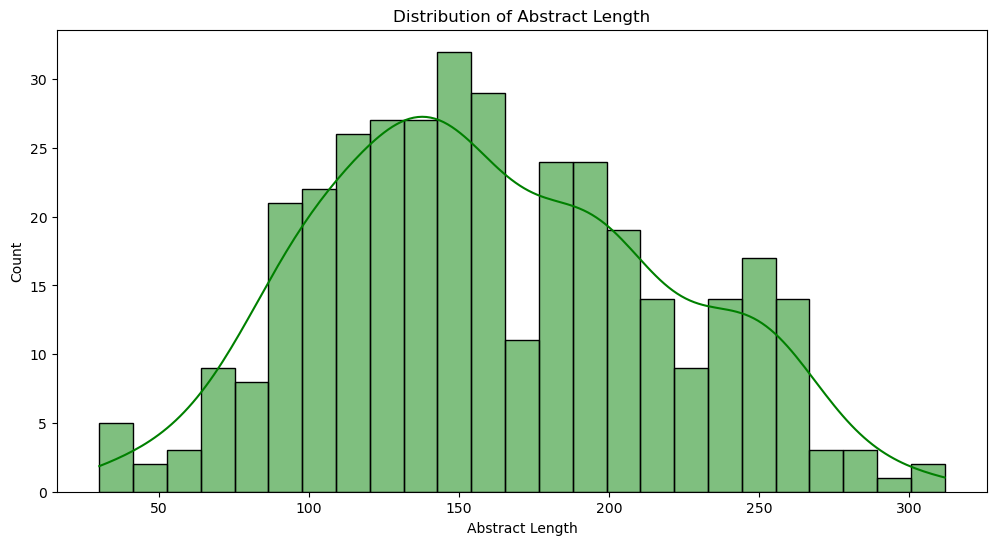

In [13]:
# plot the distribution of abstract length
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'abstract_length', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Abstract Length')
plt.xlabel('Abstract Length')
plt.ylabel('Count')
plt.show()

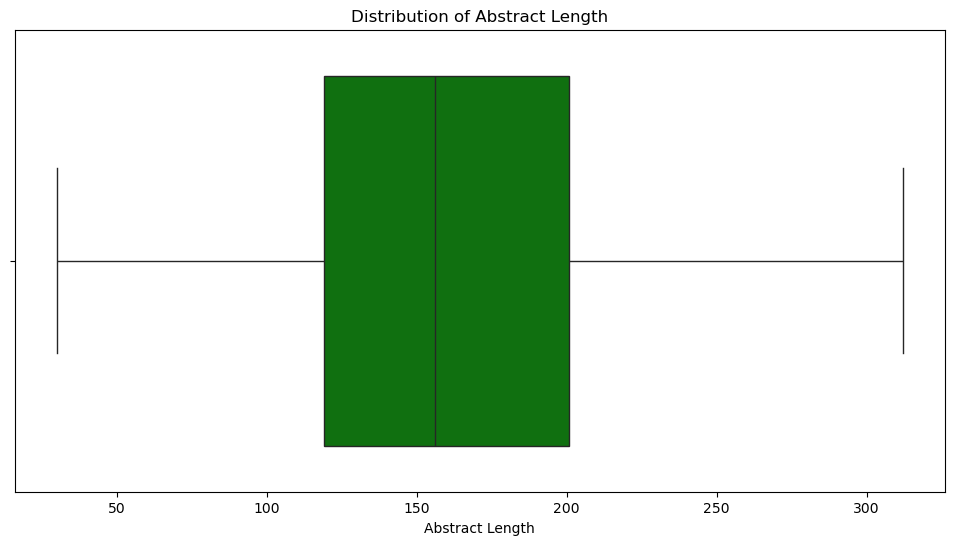

In [14]:
# box plot for the abstract length
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'abstract_length', color = 'green')
plt.title('Distribution of Abstract Length')
plt.xlabel('Abstract Length')
# plt.ylabel('Length Count')
plt.show()

Jacobs Notes: We can see here that the length of an abstract is about 120 to 200 words, although there are a few that go above and beyond. This gives us an understanding of what is required and what is expected in the general style of summarization.

## Title Length

In [15]:
# get the length of title
def get_title_length(x):
    return len(x.split())

In [16]:
# create a new column for abstract length
data['title_length'] = data['title'].apply(get_title_length)

In [17]:
# view the dataframe
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body,abstract_length,title_length
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246,17
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191,17
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126,9


In [18]:
# Summary statistics for title length
print(f'Title mean length {data['title_length'].mean()}')
print(f'Title median length {data['title_length'].median()}')
print(f'Title max length {data['title_length'].max()}')
print(f'Title standard deviation {data['title_length'].std()}')

Title mean length 11.472677595628415
Title median length 11.0
Title max length 31
Title standard deviation 4.442394385838821


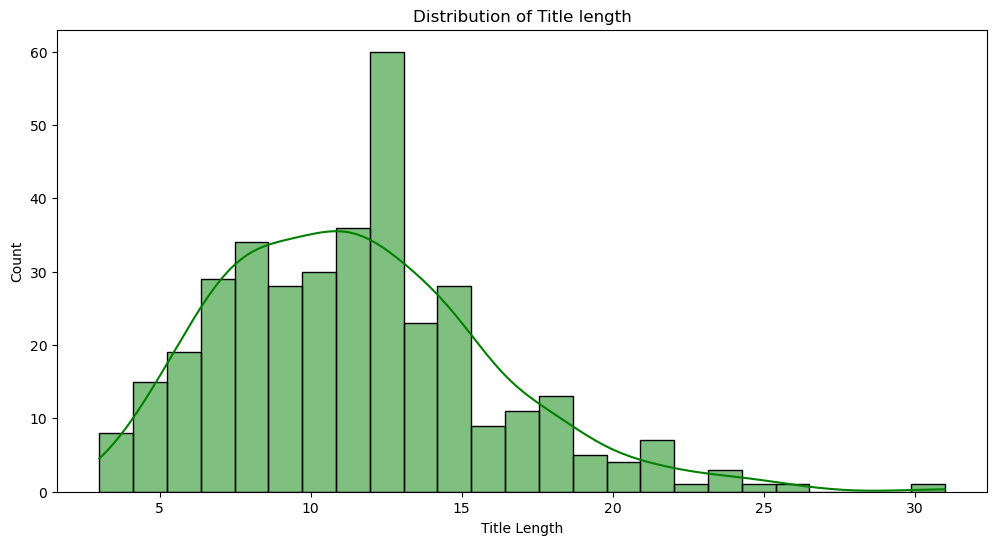

In [19]:
# plot of the distribution of title length
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'title_length', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Title length')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

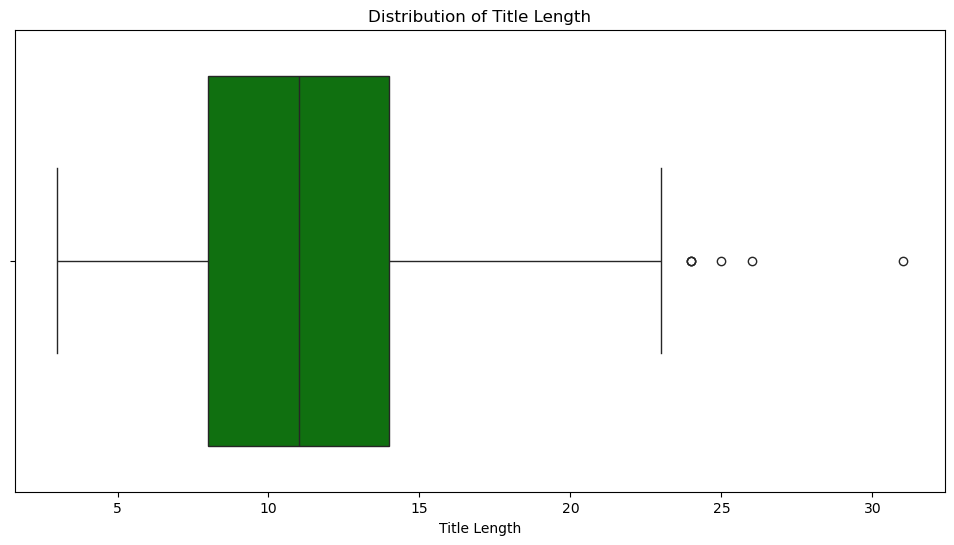

In [20]:
# box plot for the abstract length
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'title_length', color = 'green')
plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
# plt.ylabel('Length Count')
plt.show()

Jacobs Note: Most titles have about 11 words it is quite common for it to go above or below with a standard deviation of 4 words. There are some outliers with about above 24 words but they are quite few

## Body Length

In [21]:
# get the length of body
def get_body_length(x):
    return len(x.split())

In [22]:
# create a new column for body length
data['body_length'] = data['body'].apply(get_body_length)

In [23]:
# view the dataframe
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body,abstract_length,title_length,body_length
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246,17,17645
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191,17,12741
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126,9,16357


In [24]:
# Summary statistics for body length
print(f'Body mean length {data['body_length'].mean()}')
print(f'Body median length {data['body_length'].median()}')
print(f'Body max length {data['body_length'].max()}')
print(f'Body standard deviation {data['body_length'].std()}')

Body mean length 10438.554644808743
Body median length 8431.0
Body max length 70637
Body standard deviation 7637.248875392042


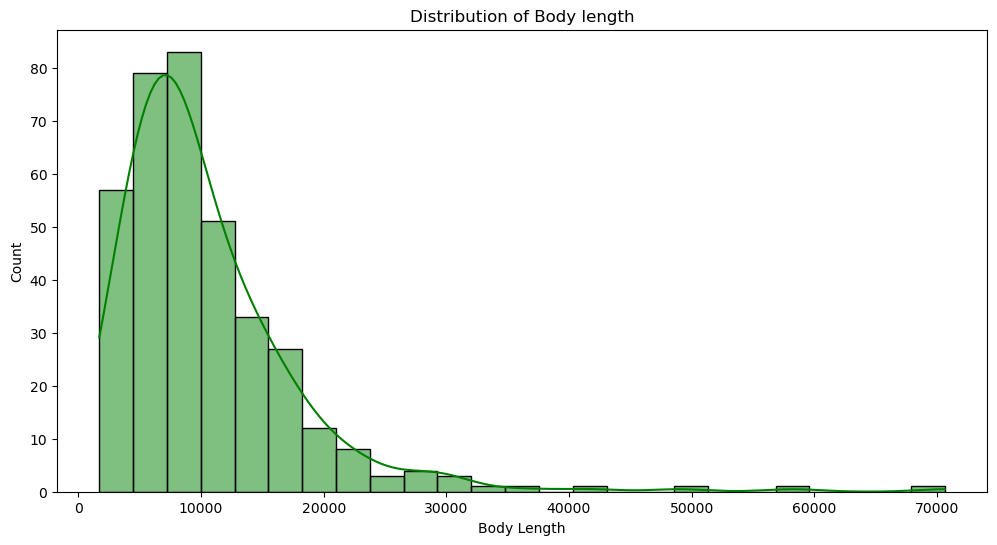

In [25]:
# plot of the distribution of body length
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'body_length', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Body length')
plt.xlabel('Body Length')
plt.ylabel('Count')
plt.show()

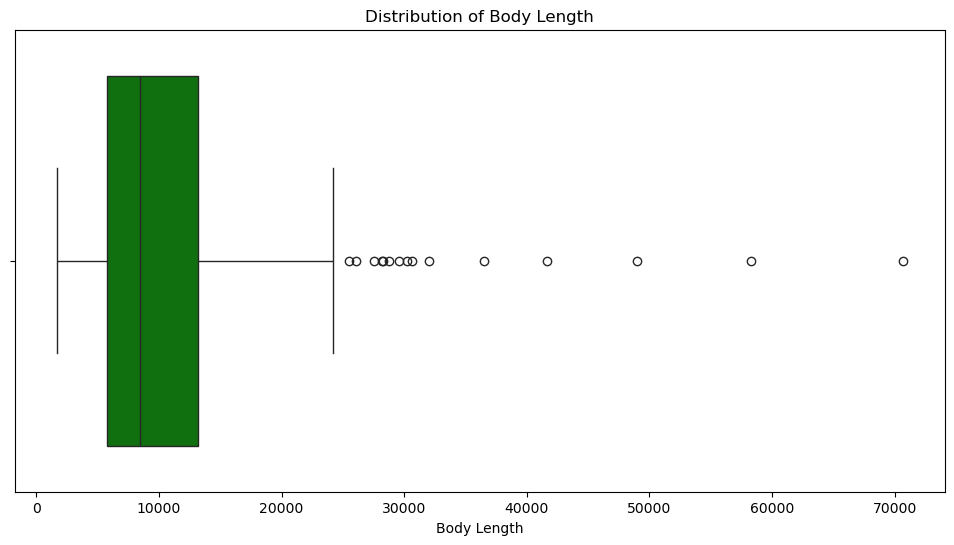

In [26]:
# box plot for the body length
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'body_length', color = 'green')
plt.title('Distribution of Body Length')
plt.xlabel('Body Length')
# plt.ylabel('Length Count')
plt.show()

--------------------

# Correlation Analyses

In [27]:
# correlation between the title length, abstract length, body length
data[['title_length', 'abstract_length', 'body_length']].corr()

,title_length,abstract_length,body_length
title_length,1.000000,0.246959,-0.082741
abstract_length,0.246959,1.000000,0.138746
body_length,-0.082741,0.138746,1.000000


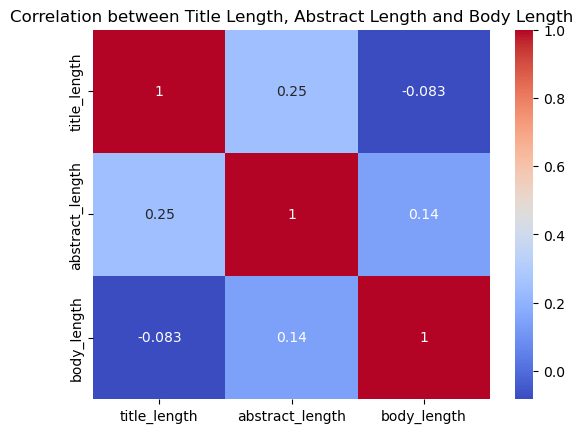

In [28]:
# correlation plot between the title length, abstract length, body length
sns.heatmap(data[['title_length', 'abstract_length', 'body_length']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between Title Length, Abstract Length and Body Length')
plt.show()

<Figure size 1200x600 with 0 Axes>

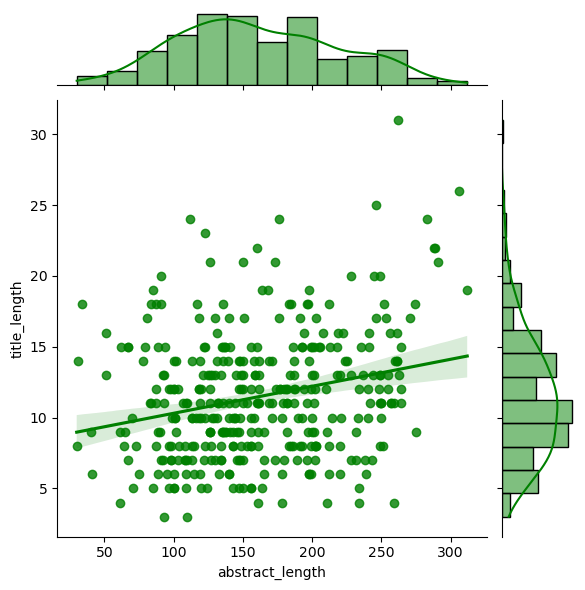

In [29]:
# jointplot between the title length and the abstract length
plt.figure(figsize = (12, 6))
sns.jointplot(data = data, x = 'abstract_length', y = 'title_length', kind = 'reg', color = 'green')
plt.show()

<Figure size 1200x600 with 0 Axes>

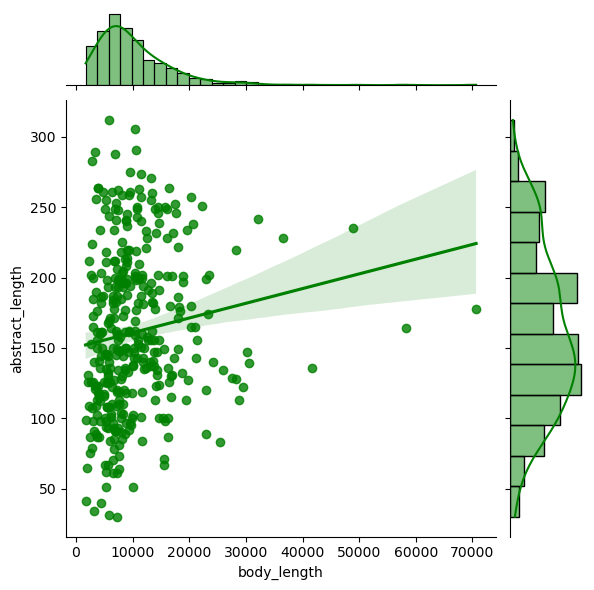

In [30]:
# jointplot between the abstract length and the body length
plt.figure(figsize= (12, 6))
sns.jointplot(data = data, x = 'body_length', y = 'abstract_length', kind = 'reg', color = 'green')
plt.show()

Jacobs Note: There is little to no correlation between the body length to the abstract length, in other words we cannot say that scientific papers with long text usually have longer abstract.

-------------------------------

# Text Length and Structure Analysis

In [31]:
# Search for ratios of abstract length to body length
data['abstract_body_ratio'] = data['abstract_length'] / data['body_length']

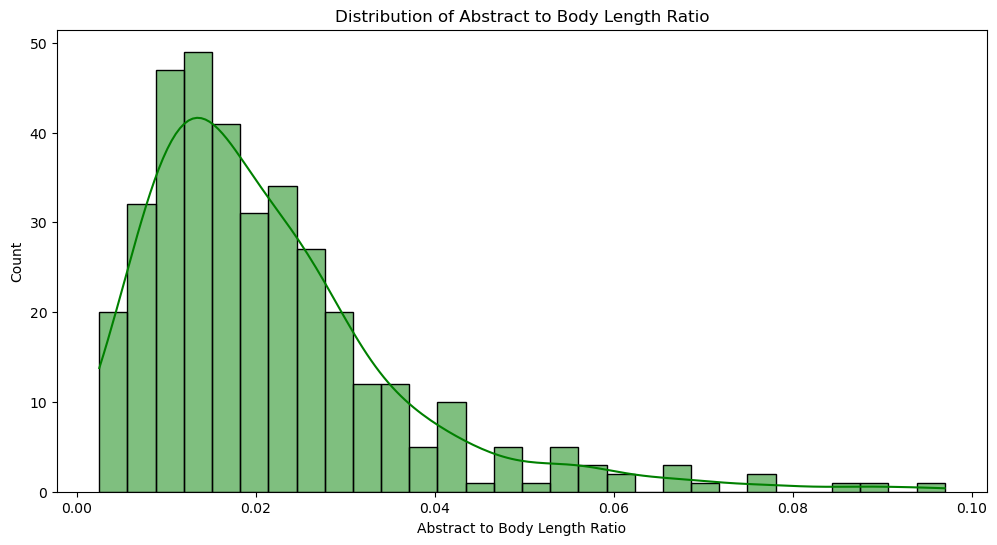

In [32]:
# Histogram plot of the ratio
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'abstract_body_ratio', bins = 30, kde = True, color = 'green')
plt.title('Distribution of Abstract to Body Length Ratio')
plt.xlabel('Abstract to Body Length Ratio')
plt.show()

Jacobs Note: We see that the ratio of abstract length to body text length is right skewed but it is quite common for the abstract to be about 4% and lower of the entire body text length.

## Sentence Count Distribution

In [33]:
# count of sentence in abstract
def get_abstract_sentence_count(x):
    tk = nltk.sent_tokenize(x, language = 'english')
    return len(tk)

# count of sentence in text body
def get_body_sentence_count(x):
    tk = nltk.sent_tokenize(x)
    return len(tk)

In [51]:
# dataframe with sentence count for abstract
data['abstract_sentence_count'] = data['abstract'].apply(get_abstract_sentence_count)

In [52]:
# dataframe with sentence count for body
data['body_sentence_count'] = data['body'].apply(get_body_sentence_count)

In [53]:
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,...,update_date,authors_parsed,pdf_link,body,abstract_length,title_length,body_length,abstract_body_ratio,abstract_sentence_count,body_sentence_count
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,...,1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246,17,17645,0.013942,8,1114
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,...,1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191,17,12741,0.014991,7,844
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,...,1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126,9,16357,0.007703,6,1074


In [60]:
# Descriptive stistics for abstract sentence count
print(f'Abstract sentence count mean {data['abstract_sentence_count'].mean()}')
print(f'Abstract sentence count median {data['abstract_sentence_count'].median()}')
print(f'Abstract sentence count max {data['abstract_sentence_count'].max()}')
print(f'Abstract sentence count std {data['abstract_sentence_count'].std()}')
print(f'Abstract sentence count min {data['abstract_sentence_count'].min()}')

Abstract sentence count mean 6.669398907103825
Abstract sentence count median 6.0
Abstract sentence count max 16
Abstract sentence count std 2.590285998785779
Abstract sentence count min 1


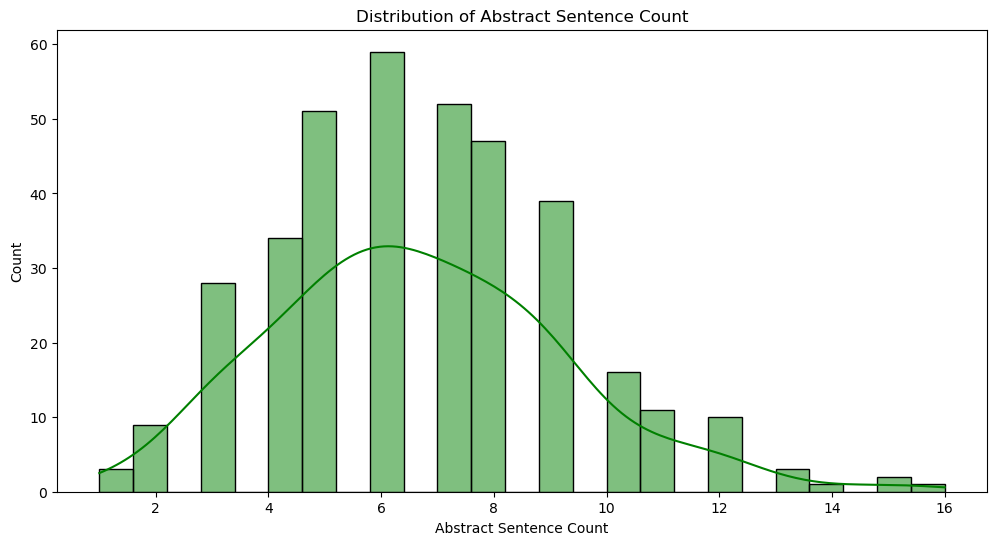

In [54]:
# Visualize the distribution of abstract sentence
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'abstract_sentence_count', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Abstract Sentence Count')
plt.xlabel('Abstract Sentence Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

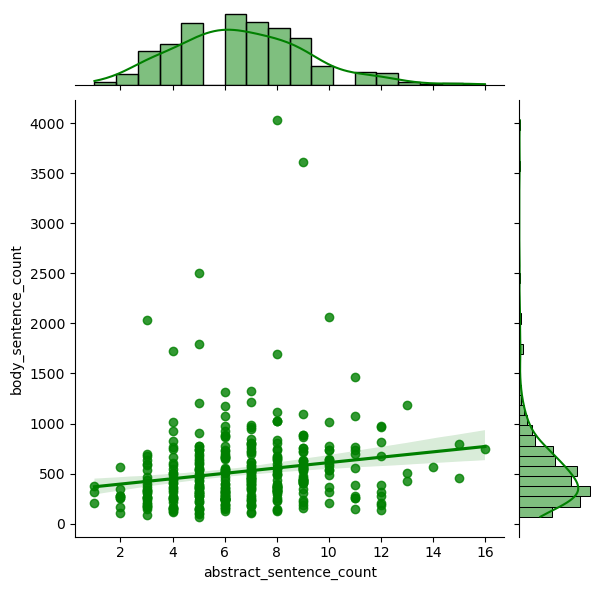

In [57]:
# Compare the abstract sentence count with the body sentence count
plt.figure(figsize = (12, 6))
sns.jointplot(data = data, x = 'abstract_sentence_count', y = 'body_sentence_count', kind = 'reg', color = 'green')
plt.show()

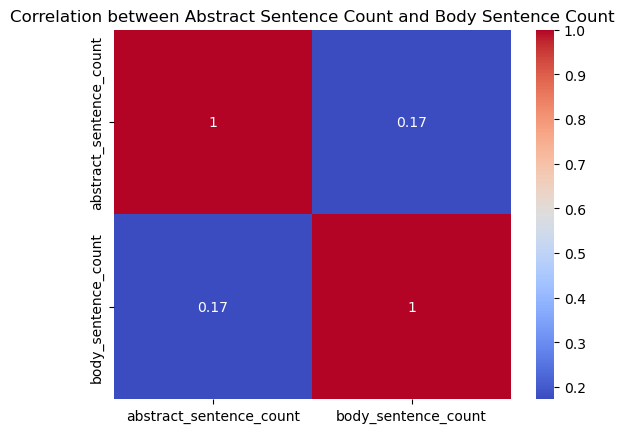

In [58]:
# Correlation between the number of abstract sentence and body sentence

data[['abstract_sentence_count', 'body_sentence_count']].corr()

# correlation plot
sns.heatmap(data[['abstract_sentence_count', 'body_sentence_count']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between Abstract Sentence Count and Body Sentence Count')
plt.show()

Jacobs Note: We can see that we can expect an abstract to have about 6 sentences and range to about 8 sentences. There is no correlation between abstract sentence count and body sentence count. In other words, longer documents do not particularly tell us if the abstract will be longer; neither will shorter research documents tell us if the abstract will be shorter.

### Sentence and Word Distribution

Is this some form of deception or perhaps the abstracts with less sentences just contain more words in each sentence? Making each sentence more dense and information rich - thereby implying lesser sentence abstract to be more concise/complete/information rich?

In [61]:
# words per sentence (wps) for abstract and body
data['abstract_wps'] = data['abstract_length'] / data['abstract_sentence_count']
data['body_wps'] = data['body_length'] / data['body_sentence_count']

In [62]:
# Descriptive statistics for abstract wps
print(f'Abstract wps mean {data['abstract_wps'].mean()}')
print(f'Abstract wps median {data['abstract_wps'].median()}')
print(f'Abstract wps max {data['abstract_wps'].max()}')
print(f'Abstract wps std {data['abstract_wps'].std()}')

Abstract wps mean 25.45344184504021
Abstract wps median 24.25
Abstract wps max 120.5
Abstract wps std 9.178829972988355


In [63]:
# Descriptive statistics for body wps
print(f'Body wps mean {data['body_wps'].mean()}')
print(f'Body wps median {data['body_wps'].median()}')
print(f'Body wps max {data['body_wps'].max()}')
print(f'Body wps std {data['body_wps'].std()}')

Body wps mean 20.625998977515987
Body wps median 20.27665546045326
Body wps max 62.89740820734341
Body wps std 5.031003034961155


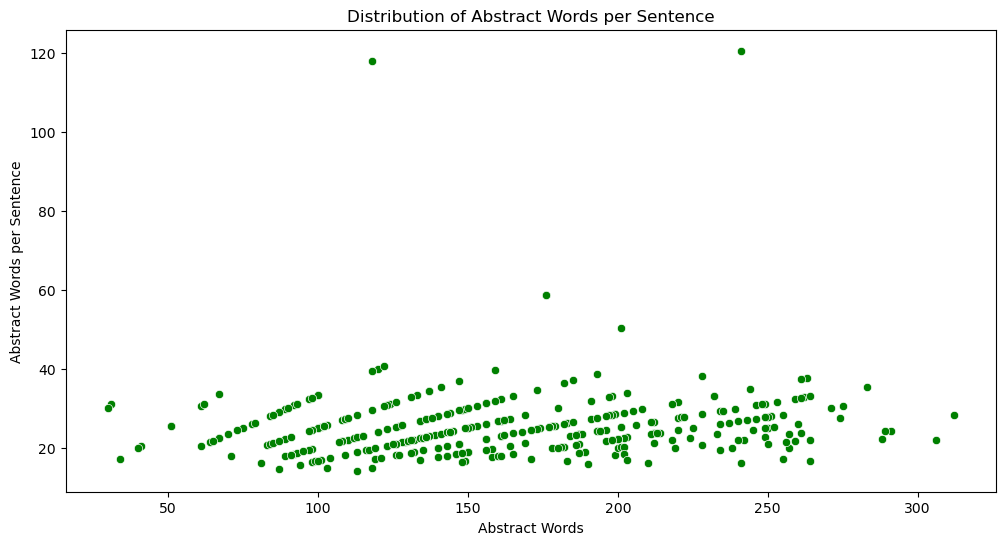

In [64]:
# Visualize the distribution of abstract wps
plt.figure(figsize = (12, 6))
sns.scatterplot(data = data, x = 'abstract_length', y = 'abstract_wps', color = 'green')
plt.title('Distribution of Abstract Words per Sentence')
plt.xlabel('Abstract Words')
plt.ylabel('Abstract Words per Sentence')
plt.show()


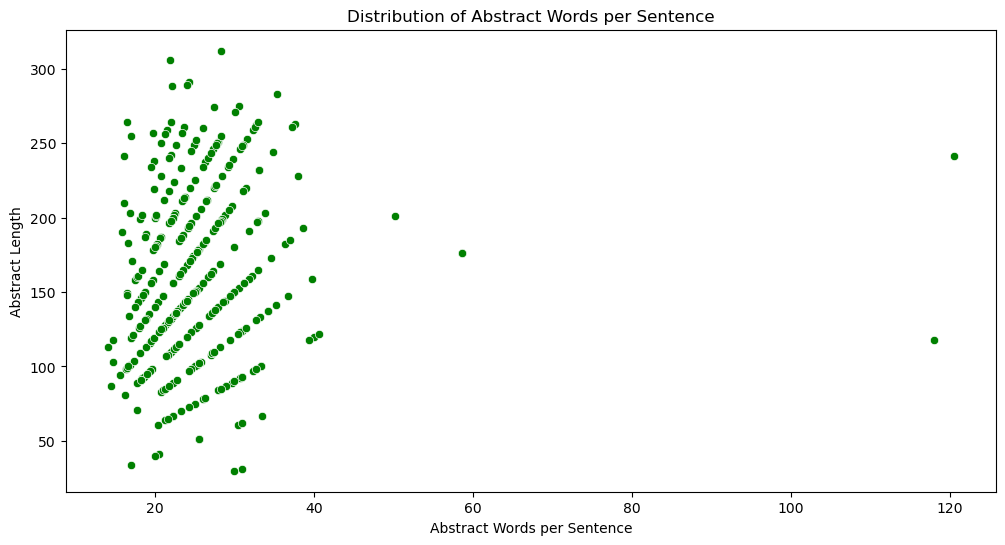

In [ ]:
# Visualize the distribution of abstract wps
plt.figure(figsize = (12, 6))
sns.scatterplot(data = data, x = 'abstract_wps', y = 'abstract_length', color = 'green')
plt.title('Distribution of Abstract Words per Sentence')
plt.xlabel('Abstract Words per Sentence')
plt.ylabel('Abstract Length')
plt.show()


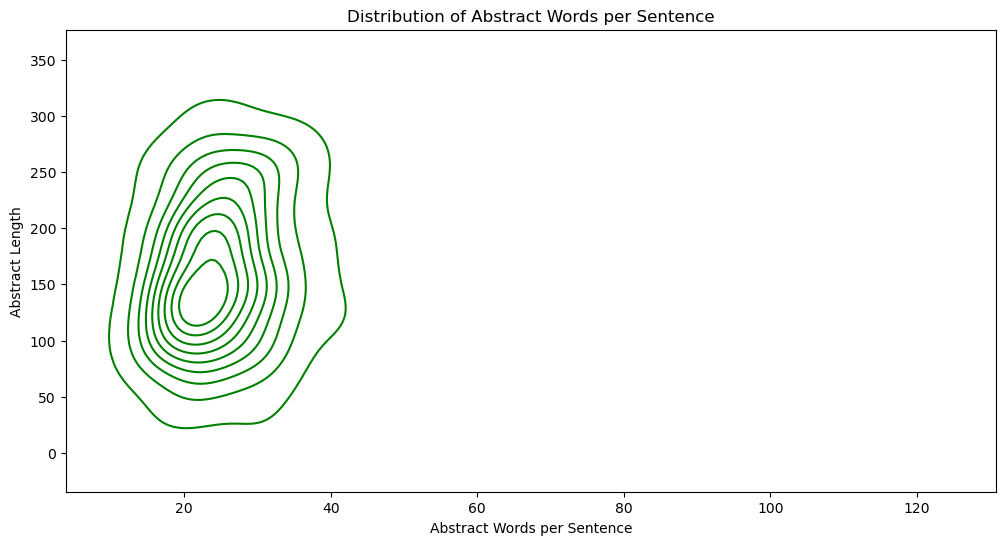

In [67]:
# Visualize the distribution of abstract wps
plt.figure(figsize = (12, 6))
sns.kdeplot(data = data, x = 'abstract_wps', y = 'abstract_length', color = 'green')
plt.title('Distribution of Abstract Words per Sentence')
plt.xlabel('Abstract Words per Sentence')
plt.ylabel('Abstract Length')
plt.show()

Jacobs Note: The number of words in each sentence in abstract are more than that of text body because they contain summary information of the body. It is common to find about 25+-9 words in each sentence of an abstract with an expected number of sentences of about 6-8. 

It is not particularly clear that there is more words in shorter abstracts, that make them really dense.

# Summarization Details

How well is the abstract capturing information - basic idea here is how many or what percentage of words that appear in the abstract appear also in the text body?

## Coverage Score

Coverage = $\(Words in Abstract that also appear in body) / total words in abstract. 

If coverage approaches 1, I can say that this is quite a good summary

In [76]:
def preprocess(text):
    """Tokenize and clean text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    return text.split()  # Tokenize

def coverage_score(abstract, body):
    """Calculate the percentage of abstract words appearing in the body."""
    abstract_words = set(preprocess(abstract)) # set to remove duplicates in abstract
    body_words = set(preprocess(body)) # set to remove duplicates in body
    if len(abstract_words) == 0:
        return 0  # Avoid division by zero
    return len(abstract_words.intersection(body_words)) / len(abstract_words)

# Apply to dataset
data['coverage_score'] = data.apply(lambda row: coverage_score(row['abstract'], row['body']), axis=1)

# Display summary statistics
print(data['coverage_score'].describe())

count    366.000000
mean       0.929387
std        0.165622
min        0.214286
25%        0.961164
50%        0.989847
75%        1.000000
max        1.000000
Name: coverage_score, dtype: float64


The abstracts are very great summaries as my coverage score approaches 1, I have a mean of 92% which is quite a great score.

## Novelty Score

How many novel words are in the abstract that are not in the text body. I expect this to be low scores by the way but this is just my premonition. 

In [80]:
def novelty_score(abstract, body):
    """Calculate the novelty score: how many abstract words don't appear in the body."""
    abstract_words = set(preprocess(abstract))
    body_words = set(preprocess(body))
    if len(abstract_words) == 0:
        return 0  # Avoid division by zero
    return len(abstract_words - body_words) / len(abstract_words)

data['novelty_score'] = data.apply(lambda row: novelty_score(row['abstract'], row['body']), axis=1)

# Display summary statistics
print(data['novelty_score'].describe())

count    366.000000
mean       0.070613
std        0.165622
min        0.000000
25%        0.000000
50%        0.010153
75%        0.038836
max        0.785714
Name: novelty_score, dtype: float64


Most of the words contained in the abstracts are all words (novel words) introduced in the text body.

# Readability

this is just for further exploration, how readable are the abstracts in comparison to the documents? are the abstracts written in such a way that it is more readable and friendly for normal people? are they employing a lot of jargon? is it easy to understand?

In [ ]:
#* REF: https://github.com/wimmuskee/readability-score
#* REF: https://wordcounter.net/words-per-page
#* REF: 'https://charactercounter.com/dale-chall-word-list.txt'
#* REF: https://en.wikipedia.org/wiki/Dale–Chall_readability_formula

#----- ATTENTION -----#
to run this section you need to pip install the following


pip install git+https://github.com/wimmuskee/readability-score.git


pip install Pyphen

In [ ]:
# import pyphen
%pip install git+https://github.com/wimmuskee/readability-score.git
%pip install Pyphen
import pyphen
from readability_score.calculators.fleschkincaid import *
from readability_score.calculators.dalechall import *
from readability_score.calculators.ari import *
from readability_score.calculators.smog import *

  Cloning https://github.com/wimmuskee/readability-score.git to /private/var/folders/f_/fmyj5wsn1wncf804w5hq712h0000gn/T/pip-req-build-4zlp9ybt
  Running command git clone --filter=blob:none --quiet https://github.com/wimmuskee/readability-score.git /private/var/folders/f_/fmyj5wsn1wncf804w5hq712h0000gn/T/pip-req-build-4zlp9ybt
  Resolved https://github.com/wimmuskee/readability-score.git to commit 5f738f1128c998eabde1e906aa72ca640210eec7
  Preparing metadata (setup.py) ... done
  Using cached pyphen-0.17.2-py3-none-any.whl.metadata (3.2 kB)
Using cached pyphen-0.17.2-py3-none-any.whl (2.1 MB)
  Created wheel for readability-score: filename=readability_score-2.1-py3-none-any.whl size=20056 sha256=064e75b41fb9bc8e9e8c9d1b8c6b588a825386d6ad806f6a8da0750aff6ec8cb
  Stored in directory: /private/var/folders/f_/fmyj5wsn1wncf804w5hq712h0000gn/T/pip-ephem-wheel-cache-g_yrgpl1/wheels/39/03/e6/76935167cea029acae89e2795a21988d827f3effebdd5b2374
Successfully built readability-score
Note: you may 

In [86]:
wordlst = pd.read_csv('https://charactercounter.com/dale-chall-word-list.txt')
wordlstSeries = pd.DataFrame(wordlst)
wordlstlist = wordlstSeries.iloc[:, 0].to_list()

In [91]:
txt_test = 'Given the inherent limitations of current pedagogical methodologies in effectively bridging the gap between theoretical constructs and their practical application within nuanced, real-world scenarios, a more holistic and interdisciplinary approach, incorporating elements of experiential learning and collaborative inquiry, is demonstrably necessary for cultivating a deeper, more nuanced understanding of complex phenomena among students, thereby fostering their capacity for critical thinking and innovative problem-solving.'

In [95]:
fk = FleschKincaid(txt_test, locale='nl_NL')
dc = DaleChall(txt_test, simplewordlist = wordlstlist, locale='de_DE')
ari = ARI(txt_test, locale='nl_NL')
smog = SMOG(txt_test, locale='nl_NL')

print(fk.min_age)
print(dc.min_age)
print(ari.min_age)
print(smog.min_age)

45
28
49
38


In [96]:
def rdblty_score(text):
    fk = FleschKincaid(text, locale='nl_NL')
    dc = DaleChall(text, simplewordlist = wordlstlist, locale='de_DE')
    ari = ARI(text, locale='nl_NL')
    smog = SMOG(text, locale='nl_NL')
    return fk.min_age, dc.min_age, ari.min_age, smog.min_age

In [97]:
rdblty_score(txt_test)

(45, 28, 49, 38)

In [98]:
rdblty_score(data['abstract'][0])

(26, 24, 25, 27)

In [99]:
rdblty_score(data['body'][0])

(15, 24, 11, 20)

In [100]:
rdblty_score(data['abstract'][0])[1]

24

In [101]:
data['abstract_rdblty'] = data['abstract'].apply(lambda x: rdblty_score(x)[1])

In [103]:
# Descriptive statistics for abstract readability score
print(f'Abstract readability score mean {data['abstract_rdblty'].mean()}')
print(f'Abstract readability score median {data['abstract_rdblty'].median()}')
print(f'Abstract readability score max {data['abstract_rdblty'].max()}')    
print(f'Abstract readability score std {data['abstract_rdblty'].std()}')

Abstract readability score mean 23.950819672131146
Abstract readability score median 24.0
Abstract readability score max 29
Abstract readability score std 1.0842771142763539


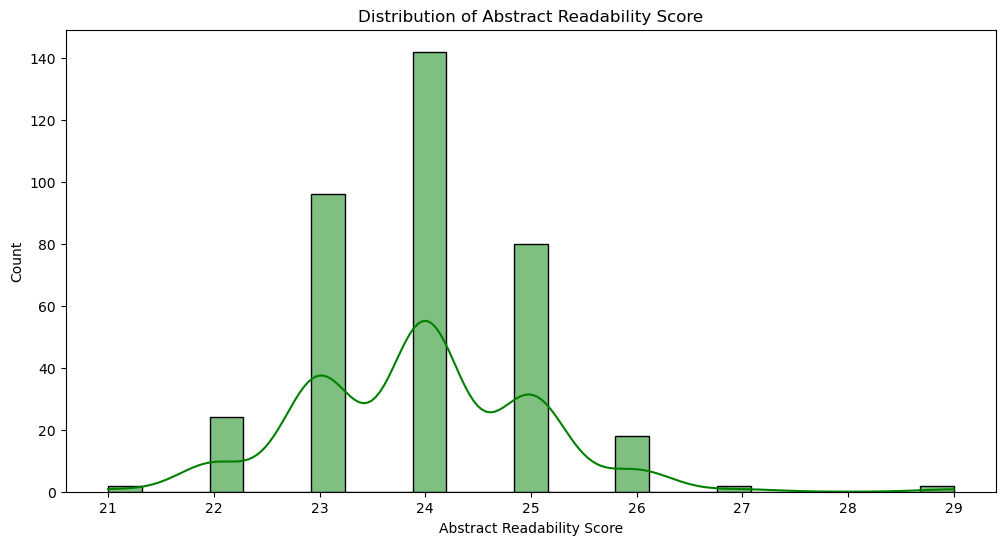

In [104]:
# Visualize the distribution of abstract readability score
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'abstract_rdblty', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Abstract Readability Score')
plt.xlabel('Abstract Readability Score')
plt.show()

# Others

In [75]:
data.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed', 'pdf_link', 'body', 'abstract_length',
       'title_length', 'body_length', 'abstract_body_ratio',
       'abstract_sentence_count', 'body_sentence_count', 'abstract_wps',
       'body_wps'],
      dtype='object')

In [74]:
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,...,pdf_link,body,abstract_length,title_length,body_length,abstract_body_ratio,abstract_sentence_count,body_sentence_count,abstract_wps,body_wps
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246,17,17645,0.013942,8,1114,30.750000,15.839318
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191,17,12741,0.014991,7,844,27.285714,15.095972
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126,9,16357,0.007703,6,1074,21.000000,15.229981


In [ ]:
import nltk

nltk.data.path.append('/Users/ikedijacobs/nltk_data')

# Now try your function again
def get_abstract_sentence_count(x):
    tk = nltk.sent_tokenize(x, language='english')
    return len(tk)

print(get_abstract_sentence_count("This is a test sentence. Here is another one!"))

In [ ]:
import os
import nltk

for path in nltk.data.path:
    punkt_path = os.path.join(path, "tokenizers", "punkt")
    if os.path.exists(punkt_path):
        print(f"'punkt' found in: {punkt_path}")
        break
else:
    print("'punkt' is NOT found in any of the listed NLTK data paths.")

'punkt' found in: /Users/ikedijacobs/nltk_data/tokenizers/punkt


In [79]:
help(set.intersection)

Help on method_descriptor:

intersection(...) unbound builtins.set method
    Return the intersection of two sets as a new set.

    (i.e. all elements that are in both sets.)

